In [3]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
import scikit_posthocs as sp
import sys

from mpl_toolkits.mplot3d import axes3d

In [4]:
AllName="dataG.pkl"
ResizesName="dataM.pkl"
ItersName="dataL.pkl"
matrixIt_Total="data_L_Total.csv"
n_cores=20
repet = 5 #CAMBIAR EL NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

significance_value = 0.05
processes = [2,10,20,40,80,120,160]

positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

labels = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,1)', '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,1)', '(20,10)',  '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,1)', '(40,10)',  '(40,20)', '(40,80)', '(40,120)','(40,160)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)', '(80,120)','(80,160)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)','(120,160)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

labelsExpand = ['(1,10)',   '(1,20)',   '(1,40)',  '(1,80)',  '(1,120)','(1,160)',
            '(10,20)',  '(10,40)', '(10,80)', '(10,120)','(10,160)',
            '(20,40)', '(20,80)', '(20,120)','(20,160)',
            '(40,80)', '(40,120)','(40,160)',
            '(80,120)','(80,160)',
            '(120,160)']
labelsShrink = ['(10,1)', 
            '(20,1)', '(20,10)',
            '(40,1)', '(40,10)',  '(40,20)',
            '(80,1)', '(80,10)',  '(80,20)', '(80,40)',
            '(120,1)','(120,10)', '(120,20)','(120,40)','(120,80)',
            '(160,1)','(160,10)', '(160,20)','(160,40)','(160,80)','(160,120)']

#                       WORST        BEST
labels_dist = ['null', 'SpreadFit', 'CompactFit']
                  #0          #1                #2                        #3
labelsMethods = ['Baseline', 'Baseline single','Baseline - Asynchronous','Baseline single - Asynchronous',
                 'Merge','Merge single','Merge - Asynchronous','Merge single - Asynchronous']
                  #4      #5             #6                     #7
    
colors_m = ['green','springgreen','blue','darkblue','red','darkred','darkgoldenrod','olive','violet']
linestyle_m = ['-', '--', '-.', ':']
markers_m = ['.','v','s','p', 'h','d','X','P','^']

OrMult_patch = mpatches.Patch(hatch='', facecolor='green', label='Baseline')
OrSing_patch = mpatches.Patch(hatch='', facecolor='springgreen', label='Baseline single')
OrPthMult_patch = mpatches.Patch(hatch='//', facecolor='blue', label='Baseline - Asyncrhonous')
OrPthSing_patch = mpatches.Patch(hatch='\\', facecolor='darkblue', label='Baseline single - Asyncrhonous')
MergeMult_patch = mpatches.Patch(hatch='||', facecolor='red', label='Merge')
MergeSing_patch = mpatches.Patch(hatch='...', facecolor='darkred', label='Merge single')
MergePthMult_patch = mpatches.Patch(hatch='xx', facecolor='yellow', label='Merge - Asyncrhonous')
MergePthSing_patch = mpatches.Patch(hatch='++', facecolor='olive', label='Merge single - Asyncrhonous')

handles_spawn = [OrMult_patch,OrSing_patch,OrPthMult_patch,OrPthSing_patch,MergeMult_patch,MergeSing_patch,MergePthMult_patch,MergePthSing_patch]

In [5]:
dfG = pd.read_pickle( AllName )

dfG['ADR'] = round((dfG['ADR'] / dfG['DR']) * 100,1)
dfG['SDR'] = round((dfG['SDR'] / dfG['DR']) * 100,1)
       
out_group = dfG.groupby(['Groups', 'ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_total']
group = dfG.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','Groups'])['T_total']

grouped_aggG = group.agg(['median'])
grouped_aggG.rename(columns={'median':'T_total'}, inplace=True) 

out_grouped_G = out_group.agg(['median'])
out_grouped_G.rename(columns={'median':'T_total'}, inplace=True) 

In [6]:
dfM = pd.read_pickle( ResizesName )

dfM['ADR'] = round((dfM['ADR'] / dfM['DR']) * 100,1)
dfM['SDR'] = round((dfM['SDR'] / dfM['DR']) * 100,1)
dfM['T_Redistribution'] = dfM['T_SR'] + dfM['T_AR']
dfM['T_Malleability'] = dfM['T_spawn'] + dfM['T_Redistribution']
       
out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']
group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']

grouped_aggM = group.agg(['median'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

out_grouped_M = out_group.agg(['median'])
out_grouped_M.columns = out_grouped_M.columns.get_level_values(0)

/tmp/ipykernel_16526/462116935.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  out_group = dfM.groupby(['NP','NC','ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']
/tmp/ipykernel_16526/462116935.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfM.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_Malleability','T_Redistribution','T_spawn','T_spawn_real','T_SR','T_AR']


In [106]:
dfL = pd.read_pickle( ItersName )

dfL['ADR'] = round((dfL['ADR'] / dfL['DR']) * 100,1)
dfL['SDR'] = round((dfL['SDR'] / dfL['DR']) * 100,1)
dfL['ADR'].fillna(-1, inplace=True)
dfL['SDR'].fillna(-1, inplace=True)
dfL['DR'].fillna(-1, inplace=True)
       
aux_df = dfL[(dfL.Asynch_Iters == True)]
group = aux_df.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_iter']
grouped_aggLAsynch = group.agg(['median','count'])
grouped_aggLAsynch.columns = grouped_aggLAsynch.columns.get_level_values(0)
grouped_aggLAsynch['T_sum'] = grouped_aggLAsynch['count'] * grouped_aggLAsynch['median'] / repet
grouped_aggLAsynch.rename(columns={'median':'T_iter'}, inplace=True) 
group = aux_df.groupby(['ADR','Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','NC'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLAsynch['T_stages'] = aux_column

aux_df = dfL[(dfL.Asynch_Iters == False)]
group = aux_df.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['median'])
grouped_aggLSynch.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLSynch['T_stages'] = aux_column

aux_df2 = aux_df[(aux_df.Is_Dynamic == True)]
group = aux_df2.groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_iter']
grouped_aggLDyn = group.agg(['median'])
grouped_aggLDyn.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df2.groupby(['ADR', 'Spawn_Method','Redistribution_Method', 'Redistribution_Strategy','NP','N_Parents'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLDyn['T_stages'] = aux_column

aux_df2 = aux_df[(aux_df.Is_Dynamic == False)]
group = aux_df2.groupby('NP')['T_iter']
grouped_aggLNDyn = group.agg(['median'])
grouped_aggLNDyn.rename(columns={'median':'T_iter'}, inplace=True)
group = aux_df2.groupby(['NP'])['T_stages']
aux_column = group.apply(list).apply(lambda x: np.median(x,0))
grouped_aggLNDyn['T_stages'] = aux_column

In [9]:
from bt_scheme import PartialSolution, BacktrackingSolver
def elegirConf(parameters):
    class StatePS(PartialSolution):
        def __init__(self, config):
            self.config= config
            self.n= len(config) #Indica el valor a añadir

        def is_solution(self):
            return self.n == len(parameters)

        def get_solution(self):
            return tuple(self.config)

        def successors(self):
            array = parameters[self.n]
            for parameter_value in array: #Test all values of the next parameter
                self.config.append(parameter_value)
                yield StatePS(self.config)
                self.config.pop()

    initialPs= StatePS([])
    return BacktrackingSolver().solve(initialPs)


def obtenerConfs(parameters):
    soluciones=[]
    for solucion in elegirConf(parameters):
        soluciones.append(solucion)
    return soluciones

def modifyToGlobal(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (parameters[i][0], configuration[i])
        else:
            aux = (configuration[i])
        usable_configuration.append(aux)
        
    return usable_configuration

def modifyToLocalDynamic(parameters, len_parameters, configuration):
    usable_configuration = []
    for i in range(len(parameters)):
        if len_parameters[i] > 1:
            aux = (configuration[i], -1)
        else:
            aux = (-1)
        usable_configuration.append(aux)
        
    return tuple(usable_configuration)

def CheckConfExists(configuration, dataSet, type_conf='global'):
    exists = False
    config = list(configuration)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                
                if type_conf == 'global':
                    config.append((np_aux, ns_aux))
                elif type_conf == 'malleability':
                    config.append(np_aux)
                    config.append(ns_aux)
                elif type_conf == 'local':
                    config.append(np_aux)
                    
                if tuple(config) in dataSet.index:     
                    exists = True # FIXME Return here true?
                config.pop()
                
                if type_conf == 'malleability':
                    config.pop()
    return exists

In [10]:
adr = [0,96.6]
sp_method = [0,1]
rd_method = [0,1]
rd_strat  = [1,2]
parameters = [adr, sp_method, rd_method, rd_strat]
parameters_names = ['ADR', 'Spawn_Method', 'Redistribution_Method', 'Redistribution_Strategy']
len_parameters = [1,2,2,2]
configurations_aux = obtenerConfs(parameters)
configurations = []
configurations_local_dynamic = set()
configurations_local = set()
configurations_simple = []
for checked_conf in configurations_aux:
    aux_conf = modifyToGlobal(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggG):
        configurations.append(aux_conf)

    if CheckConfExists(checked_conf, grouped_aggM, 'malleability'):
        configurations_simple.append(list(checked_conf))
        
    aux_conf = modifyToLocalDynamic(parameters, len_parameters, checked_conf)
    if CheckConfExists(aux_conf, grouped_aggLDyn, 'local'):
        configurations_local_dynamic.add(aux_conf)

configurations_local_dynamic = list(configurations_local_dynamic)
for index in range(len(configurations_local_dynamic)):
    configurations_local_dynamic[index] = list(configurations_local_dynamic[index])

print(configurations_simple)
print(configurations_local_dynamic)
print(configurations)
print(len(configurations))

[[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1], [96.6, 0, 0, 1], [96.6, 0, 0, 2], [96.6, 0, 1, 1], [96.6, 0, 1, 2], [96.6, 1, 0, 1], [96.6, 1, 0, 2], [96.6, 1, 1, 1], [96.6, 1, 1, 2]]
[[-1, (0, -1), (1, -1), (2, -1)], [-1, (0, -1), (0, -1), (2, -1)], [-1, (1, -1), (0, -1), (2, -1)], [-1, (1, -1), (1, -1), (1, -1)], [-1, (0, -1), (1, -1), (1, -1)], [-1, (0, -1), (0, -1), (1, -1)], [-1, (1, -1), (1, -1), (2, -1)], [-1, (1, -1), (0, -1), (1, -1)]]
[[0, (0, 0), (0, 0), (1, 1)], [0, (0, 0), (0, 1), (1, 1)], [0, (0, 1), (0, 0), (1, 1)], [0, (0, 1), (0, 1), (1, 1)], [96.6, (0, 0), (0, 0), (1, 1)], [96.6, (0, 0), (0, 0), (1, 2)], [96.6, (0, 0), (0, 1), (1, 1)], [96.6, (0, 0), (0, 1), (1, 2)], [96.6, (0, 1), (0, 0), (1, 1)], [96.6, (0, 1), (0, 0), (1, 2)], [96.6, (0, 1), (0, 1), (1, 1)], [96.6, (0, 1), (0, 1), (1, 2)]]
12


In [11]:
#ALPHA COMPUTATION
def compute_alpha(config_a, config_b):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                config_a.append(np_aux)
                config_a.append(ns_aux)
                config_b.append(np_aux)
                config_b.append(ns_aux)
                grouped_aggM.loc[tuple(config_b),'Alpha'] = grouped_aggM.loc[tuple(config_b),'T_Malleability'] / grouped_aggM.loc[tuple(config_a),'T_Malleability']
                config_a.pop()
                config_a.pop()
                config_b.pop()
                config_b.pop()
                
                
                config_a.insert(0,ns_aux)
                config_a.insert(0,np_aux)
                config_b.insert(0,ns_aux)
                config_b.insert(0,np_aux)
                out_grouped_M.loc[tuple(config_b),'Alpha'] = out_grouped_M.loc[tuple(config_b),'T_Malleability'] / out_grouped_M.loc[tuple(config_a),'T_Malleability']
                config_a.pop(0)
                config_a.pop(0)
                config_b.pop(0)
                config_b.pop(0)

if not ('Alpha' in grouped_aggM.columns):
    for config_a in configurations_simple:
        for config_b in configurations_simple:
            if config_a[1:-1] == config_b[1:-1] and config_a[0] == 0 and config_b[0] != 0:
                compute_alpha(config_a, config_b)
else:
    print("ALPHA already exists")

In [12]:
#OMEGA COMPUTATION
def compute_omega(config):
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if len(config) > len(parameters):
                    config.pop()
                    config.pop()
                config.append(np_aux)
                config.append(ns_aux)
                grouped_aggLAsynch.at[tuple(config),'Omega'] = grouped_aggLAsynch.at[tuple(config),'T_iter'] / grouped_aggLSynch.at[np_aux,'T_iter']
                value = grouped_aggLAsynch.at[tuple(config),'T_stages'] / grouped_aggLSynch.at[np_aux,'T_stages']
                grouped_aggLAsynch.at[tuple(config),'Omega_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Omega' in grouped_aggLAsynch.columns):
    for config in configurations:
        if config[0] != 0:
            compute_omega(config)
else:
    print("OMEGA already exists")

/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [13]:
#Dynamic Coherence COMPUTATION
def compute_dyn_coherency(config):
    for np_aux in processes:
        for n_parents_aux in processes:
            if np_aux != n_parents_aux:
                config.append(np_aux)
                config.append(n_parents_aux)
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency'] = grouped_aggLDyn.at[tuple(config),'T_iter'] / grouped_aggLNDyn.at[np_aux,'T_iter']
                value = grouped_aggLDyn.at[tuple(config),'T_stages'] / grouped_aggLNDyn.at[np_aux,'T_stages']
                grouped_aggLDyn.at[tuple(config),'Dyn_Coherency_Stages'] = value.astype(object)
                config.pop()
                config.pop()

if not ('Dyn_Coherency' in grouped_aggLDyn.columns):
    for config in configurations_local_dynamic:
        compute_dyn_coherency(config)
else:
    print("Dyn_Coherency already exists")

/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]
/home/usuario/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1537: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return arr.searchsorted(value, side=side, sorter=sorter)  # type: ignore[arg-type]


In [ ]:
out_grouped_G.to_excel("resultG.xlsx") 
out_grouped_M.to_excel("resultM.xlsx") 
grouped_aggLAsynch.to_excel("AsynchIters.xlsx")
grouped_aggLDyn.to_excel("DynCoherence.xlsx")

In [148]:
grouped_aggM.loc[(96.6,slice(None))]

T_Malleability  \
Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                    
0            0                     1                       2   10         1.450045   
                                                               20         2.071983   
                                                               40         1.843507   
                                                               80         1.783597   
                                                               120        1.738361   
...                                                                            ...   
1            1                     2                       160 10         3.503912   
                                                               20         3.487746   
                                                               40         2.997133   
                                                               80         1.798157   
                                                               120        1.665167   

                                                                    T_Redistribution  \
Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                      
0            0                     1                       2   10           1.064642   
                                                               20           1.104158   
                                                               40           0.920655   
                                                               80           0.869270   
                                                               120          0.838482   
...                                                                              ...   
1            1                     2                       160 10           3.167023   
                                                               20           3.075578   
                                                               40           1.817674   
                                                               80           0.864571   
                                                               120          0.548051   

                                                                     T_spawn  \
Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC              
0            0                     1                       2   10   0.369660   
                                                               20   0.934080   
                                                               40   0.918149   
                                                               80   0.920874   
                                                               120  0.945228   
...                                                                      ...   
1            1                     2                       160 10   0.336889   
                                                               20   0.507027   
                                                               40   1.179459   
                                                               80   0.957581   
                                                               120  1.122762   

                                                                    T_spawn_real  \
Spawn_Method Redistribution_Method Redistribution_Strategy NP  NC                  
0            0                     1                       2   10       0.000000   
                                                               20       0.000000   
                                                               40       0.000000   
                                                               80       0.000000   
                                                               120      0.000000   
...                                                                          ...   
1            1                     2                       160 10       0.086018   
       

In [173]:
dfM

NP  NC  Total_Stages  Granularity    SDR   ADR          DR  \
0     160  40             4       100000  100.0   0.0  3947883504   
1     160  40             4       100000  100.0   0.0  3947883504   
2     160  40             4       100000  100.0   0.0  3947883504   
3     160  40             4       100000  100.0   0.0  3947883504   
4     160  40             4       100000  100.0   0.0  3947883504   
...   ...  ..           ...          ...    ...   ...         ...   
2515    2  40             4       100000    3.4  96.6  3947883503   
2516    2  40             4       100000    3.4  96.6  3947883503   
2517    2  40             4       100000    3.4  96.6  3947883503   
2518    2  40             4       100000    3.4  96.6  3947883503   
2519    2  40             4       100000    3.4  96.6  3947883503   

      Redistribution_Method  Redistribution_Strategy  Spawn_Method  ...  \
0                         1                        1             0  ...   
1                         1                        1             0  ...   
2                         1                        1             0  ...   
3                         1                        1             0  ...   
4                         1                        1             0  ...   
...                     ...                      ...           ...  ...   
2515                      1                        2             1  ...   
2516                      1                        2             1  ...   
2517                      1                        2             1  ...   
2518                      1                        2             1  ...   
2519                      1                        2             1  ...   

      Iters  Asynch_Iters                                             T_iter  \
0       500             0  (0.08095, 0.076509, 0.079877, 0.074691, 0.0760...   
1       500             0  (0.083757, 0.069349, 0.068418, 0.065849, 0.061...   
2       500             0  (0.096849, 0.072226, 0.075321, 0.065634, 0.075...   
3       500             0  (0.07964, 0.070345, 0.073844, 0.086362, 0.0720...   
4       500             0  (0.098563, 0.068683, 0.090294, 0.083441, 0.086...   
...     ...           ...                                                ...   
2515    500             4  (0.653634, 0.634598, 0.633836, 0.634582, 0.634...   
2516    500             4  (0.653119, 0.633832, 0.633014, 0.633593, 0.633...   
2517    500             4  (0.652854, 0.633725, 0.632971, 0.633643, 0.633...   
2518    500             4  (0.652802, 0.633527, 0.633319, 0.633376, 0.633...   
2519    500             4  (0.653575, 0.634228, 0.634006, 0.63414, 0.6339...   

                                               T_stages   T_spawn  \
0     ((0.010705, 0.001643, 0.000203, 0.067232), (0....  1.347948   
1     ((0.010718, 0.000521, 4.2e-05, 0.071717), (0.0...  1.408781   
2     ((0.010704, 0.001999, 0.000233, 0.079332), (0....  1.336949   
3     ((0.010704, 0.003768, 0.000384, 0.062777), (0....  1.444550   
4     ((0.010716, 0.000262, 0.00023, 0.086761), (0.0...  1.467106   
...                                                 ...       ...   
2515  ((0.622565, 7e-06, 2e-06, 0.03106), (0.62308, ...  1.341950   
2516  ((0.621538, 0.000137, 3e-06, 0.03144), (0.6218...  1.382511   
2517  ((0.621539, 9.8e-05, 2e-06, 0.031214), (0.6218...  1.348554   
2518  ((0.621599, 0.000231, 2e-06, 0.030969), (0.622...  1.310184   
2519  ((0.622518, 7e-06, 2e-06, 0.031046), (0.622878...  1.364008   

     T_spawn_real      T_SR      T_AR T_Redistribution T_Malleability  
0        0.000000  0.752765  0.000000         0.752765       2.100713  
1        0.000000  0.780452  0.000000         0.780452       2.189233  
2        0.000000  0.526026  0.000000         0.526026       1.862975  
3        0.000000  0.688739  0.000000         0.688739       2.133289  
4        0.000000  0.592875  0.000000         0.592875       2.059981  
...           ...       ...       ...              ... 

In [175]:
#FIXME Reescribir a comprobar suma de iters async contra T_Malleability
#for index in range(len(configurations)):
    #if configurations[index][0] > 0:
        #configM = configurations_simple[index]
        #configL = configurations[index]
        #grouped_aggM.loc[(*configM,slice(None)),'Resize_Coherency'] = (grouped_aggLAsynch.loc[(*configL,slice(None))]['T_sum'] / grouped_aggM.loc[(*configM,slice(None))]['T_Malleability']).values
test=dfM[(dfM.Asynch_Iters > 0)]
for index in range(len(test)):
    aux_value = test["T_iter"].values[index][-test["Asynch_Iters"].values[index]:]
    aux_value = np.sum(aux_value)
    coherent = test["T_Malleability"].values[index] > aux_value
    print("Index: " +str(index) + " is coherent: " + str(coherent) + ". Malleability=" + str(test["T_Malleability"].values[index]) + " Asynch="+ str(aux_value) + \
          " Spawn="+str(test["Spawn_Method"].values[index]))
    if index%5==4:
        print(" ")

Index: 0 is coherent: False. Malleability=5.769278 Asynch=9.175561 Spawn=0
Index: 1 is coherent: False. Malleability=3.682582 Asynch=7.481312 Spawn=0
Index: 2 is coherent: False. Malleability=2.7591530000000004 Asynch=6.264269 Spawn=0
Index: 3 is coherent: False. Malleability=4.966915999999999 Asynch=8.449237 Spawn=0
Index: 4 is coherent: False. Malleability=1.866746 Asynch=6.59518 Spawn=0
 
Index: 5 is coherent: False. Malleability=1.911482 Asynch=2.248515 Spawn=0
Index: 6 is coherent: False. Malleability=1.9710299999999998 Asynch=2.760144 Spawn=0
Index: 7 is coherent: False. Malleability=1.763885 Asynch=4.08746 Spawn=0
Index: 8 is coherent: False. Malleability=1.906851 Asynch=4.300668999999999 Spawn=0
Index: 9 is coherent: False. Malleability=1.855878 Asynch=2.45997 Spawn=0
 
Index: 10 is coherent: True. Malleability=10.052676 Asynch=9.235494000000001 Spawn=0
Index: 11 is coherent: False. Malleability=9.67812 Asynch=10.612835 Spawn=0
Index: 12 is coherent: True. Malleability=8.962805

In [92]:
def create_group_boundary(rms_boundary, np_aux, ns_aux):
    tc_boundary = 0
    boundaries = None
    if rms_boundary != 0:
        # El porcentaje de tc_boundary se tiene en cuenta para eliminar aquellos
        # tiempos demasiado grandes en su malleability time respecto al más pequeño
        boundaries = get_np_ns_data("T_Malleability", grouped_aggM, configurations_simple, np_aux, ns_aux)
        tc_boundary = min(boundaries)
        tc_boundary = tc_boundary + tc_boundary*rms_boundary
    return tc_boundary, boundaries

# Aquellos grupos que tengán valores por encima del límite no se considerarán
def check_groups_boundaries(dataLists, boundaries, tc_boundary):
    for index in range(len(boundaries)):
        if boundaries[index] > tc_boundary:
            dataLists[index] = float('infinity')


In [ ]:
def get_perc_differences(dataLists, boundaries, tc_boundary):
    perc = 1.05
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    bestMax = -1
    otherBest=[]
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en media/mediana
        if best == -1:
            best = index
            bestMax = dataLists[best] * perc
        elif dataLists[index] <= bestMax: # Media/Medianas i < Media/Mediana best
            otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

def get_stat_differences(dataLists, df_Res, boundaries, tc_boundary):
    if boundaries != None: # Si se usa perspectiva de RMS, se desconsideran valores muy altos
        check_groups_boundaries(dataLists, boundaries, tc_boundary) 
    indexes = np.argsort(dataLists)
    
    best = -1
    otherBest=[]  
    for index in indexes: # Para cada metodo -- Empezando por el tiempo más bajo en mediana
        if dataLists[index] != float('infinity'):
            if best == -1:
                best = index
            elif not df_Res.iat[best,index]: # df_Res == False indicates 'index' and 'best' have the same mean/median
                otherBest.append(index)
                
    otherBest.insert(0,best)
    return otherBest

In [ ]:
grouped_np = ["T_total"]
separated_np = ["T_Malleability", "T_Redistribution", "T_spawn", "T_SR", "T_AR", "Alpha", "Omega"]

def get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux):
    dataLists=[]
    for config in used_config:
        if tipo in grouped_np:
            config.append((np_aux,ns_aux))
        elif tipo in separated_np:
            config.append(np_aux)
            config.append(ns_aux)
        
        if tuple(config) in data_aux.index:
            aux_value = data_aux.loc[tuple(config),tipo]
            if isinstance(aux_value, pd.Series):
                aux_value = aux_value.values[0]
            if aux_value == 0: #Values of zero indicate it was not performed
                aux_value = float('infinity')
        else: # This configuration is not present in the dataset
            aux_value = float('infinity')
        dataLists.append(aux_value)
        config.pop()
        if tipo in separated_np:
            config.pop()
    return dataLists

def get_config_data(tipo, data_aux, config):
    dataLists=[]
    for ns_aux in processes:
        for np_aux in processes:
            if np_aux != ns_aux:
                
                if tipo in grouped_np:
                    config.append((np_aux,ns_aux))
                elif tipo in separated_np:
                    config.append(np_aux)
                    config.append(ns_aux)
                if tuple(config) in data_aux.index:
                    aux_value = data_aux.loc[tuple(config),tipo]
                    if isinstance(aux_value, pd.Series):
                        aux_value = aux_value.values[0]
                    if aux_value == 0: #Values of zero indicate it was not performed
                        aux_value = float('infinity')
                else: # This configuration is not present in the dataset
                    aux_value = float('infinity')
                dataLists.append(aux_value)
                config.pop()
                if tipo in separated_np:
                    config.pop()
    return dataLists

def get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux):
    dataLists=[]
    if tipo in grouped_np:
        tuple_data = (np_aux, ns_aux)
        df_npns_aux = df_check.loc[(df_check['Groups']==tuple_data)]
    elif tipo in separated_np:
        df_npns_aux = df_check.loc[(df_check['NP']==np_aux)]
        df_npns_aux = df_npns_aux.loc[(df_npns_aux['NC']==ns_aux)]
        
    for config in used_config:
        df_config_aux = df_npns_aux
        for index in range(len(config)):
            aux_name = parameters_names[index]
            aux_value = config[index]
            df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
                
        aux_value = list(df_config_aux[tipo])
        dataLists.append(aux_value)
    return dataLists

def get_df_config_data(df_check, tipo, config):
    dataLists=[]
    df_config_aux = df_check
    for index in range(len(config)):
        aux_name = parameters_names[index]
        aux_value = config[index]
        df_config_aux = df_config_aux.loc[(df_config_aux[aux_name] == aux_value)]
        
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                if tipo in grouped_np:
                    tuple_data = (np_aux, ns_aux)
                    df_aux = df_config_aux.loc[(df_config_aux['Groups']==tuple_data)]
                elif tipo in separated_np:
                    df_aux = df_config_aux.loc[(df_config_aux['NP']==np_aux)]
                    df_aux = df_aux.loc[(df_aux['NC']==ns_aux)]
                aux_value = list(df_aux[tipo])
                dataLists.append(aux_value)
    return dataLists
                
                

In [ ]:
def check_normality(df_check, tipo, used_config, fast=True):
    normality_array=[True] * (len(processes) * (len(processes)-1))
    normality = True
    total=0
    i=-1
    #Comprobar para cada configuración si se sigue una distribución normal/gaussiana
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                i+=1
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                st,p = stats.shapiro(dataLists) # Tendrían que ser al menos 20 datos y menos de 50
                if p < significance_value: # Reject H0
                    if fast:
                        return False
                    normality_array[i] = False
                    normality = False
                    total+=1
    print("Se sigue una distribución guassiana: " + str(normality) + "\nUn total de: " + str(total) + " no siguen una gaussiana")
    print(normality_array)
    return normality

def compute_global_stat_difference(dataLists, parametric, np_aux, ns_aux):
    if parametric:
        st,p=stats.f_oneway(*dataLists)
    else:
        st,p=stats.kruskal(*dataLists)
    if p > significance_value:
        print("For NP " + str(np_aux) + " and " + str(ns_aux) + " is accepted H0")
        return True # Equal values || Accept H0
    return False # Some groups are different || Reject H0

def compute_global_posthoc(dataLists, parametric):
    data_stats=[]
    data_stats2=[]
    ini=0
    end=len(dataLists)
    if parametric:
        df_aux = sp.posthoc_ttest(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.mean(dataLists[i]))
            
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different means || Reject H1
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    else:
        df_aux = sp.posthoc_conover(dataLists)
        df_Res = df_aux.copy()
        for i in range(ini,end):
            data_stats.append(np.median(dataLists[i]))
            data_stats2.append(stats.iqr(dataLists[i],axis=0))
            for j in range(ini,end):
                if df_Res.iat[i,j] < significance_value: # Different medians || Reject H1
                    df_Res.iat[i, j] = True
                else:
                    df_Res.iat[i, j] = False
    #print(df_Res)
    #print(df_aux)
    #print(data_stats)
    #print(data_stats2)
    #aux_value = min(data_stats)
    #print(data_stats.index(aux_value))
    return df_Res, data_stats

In [ ]:
def results_with_perc(tipo, data_aux, used_config, rms_boundary=0):
    results = []
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_np_ns_data(tipo, data_aux, used_config, np_aux, ns_aux)

                aux_data = get_perc_differences(dataLists, boundaries, tc_boundary)
                results.append(aux_data)
    return results

def results_with_stats(tipo, df_check, used_config, rms_boundary=0):
    results = []
    use_parametric = check_normality(df_check,tipo, used_config)
    for np_aux in processes:
        for ns_aux in processes:
            if np_aux != ns_aux:
                tc_boundary, boundaries = create_group_boundary(rms_boundary, np_aux, ns_aux)
                
                #Get all values for particular config with these number of processes
                dataLists = get_df_np_ns_data(df_check, tipo, used_config, np_aux, ns_aux)
                equal_set = compute_global_stat_difference(dataLists, use_parametric, np_aux, ns_aux)
                if equal_set:
                    aux_data = list(range(len(used_config))) # All data is equal
                else:
                    res_aux, times_aux = compute_global_posthoc(dataLists, use_parametric)
                    aux_data = get_stat_differences(times_aux, res_aux, boundaries, tc_boundary)
                
                results.append(aux_data)
    
    return results

In [ ]:
checked_type='T_spawn'
use_perc = False
select_first_winner = False
prefer_first_winner = False
rms_boundary=0 # Poner a 0 para perspectiva de app. Valor >0 y <1 para perspectiva de RMS
if checked_type=='T_total':
    tipo="T_total"
    if use_perc:
        data_aux = grouped_aggG
    else:
        data_aux = dfG
    used_config = configurations
elif checked_type=='T_Malleability' or checked_type=='T_spawn' or checked_type=='T_SR' or checked_type=='T_AR' or checked_type=='T_Redistribution':
    tipo=checked_type
    
    if use_perc:
        data_aux = grouped_aggM
    else:
        data_aux = dfM
    used_config = configurations_simple
    
if use_perc:
    results = results_with_perc(tipo, data_aux, used_config, rms_boundary)
else:
    results = results_with_stats(tipo, data_aux, used_config, rms_boundary)

#Results is a 2 dimensional array. First dimension indicates lists of winners of a particulal number of processes (NP->NC). 
#Second dimension is an ordered preference of indexes in the array configurations.
print(results)
print(len(results))

In [71]:
#Lista de indices de mayor a menor según el total de ocurrencias
aux_array = []
for data in results:
    aux_array+=data
aux_keys, aux_counts = np.unique(aux_array, return_counts=True)
aux_ordered_index=list(reversed(np.argsort(aux_counts)))

#Lista de indices de mayor a menor según el total de ocurrencias del primero de cada grupo
aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_keys_best, aux_counts_best = np.unique(aux_array, return_counts = True)
aux_ordered_best_index=list(reversed(np.argsort(aux_counts_best)))

def heatmap_get_best(index, ordered_array, keys_array, counts_array, prefer_winner=False):
    valid_candidates_indexes = []
    prev_counts = -1
    for tested_index in ordered_array:
        if keys_array[tested_index] in results[index]:
            if counts_array[tested_index] >= prev_counts:
                prev_counts = counts_array[tested_index]
                valid_candidates_indexes.append(tested_index)
            else:
                break
                
    if prefer_winner: # Si esta activo, en caso de empate en ocurrencias se selecciona el menor tiempo
        for tested_index in results[index]:
            if tested_index in valid_candidates_indexes:
                return tested_index
    return min(valid_candidates_indexes) # En caso de empate se devuelve el que tiene menor valor (Suele ser la config más simple)

i=0
j=0
used_aux=0
heatmap=np.zeros((len(processes),len(processes))).astype(int)

if select_first_winner:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                heatmap[i][j] = results[results_index][0]
else:
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i==j:
                heatmap[i][j]=-1
                used_aux+=1
            else:
                results_index = i*len(processes) + j - used_aux
                index = heatmap_get_best(results_index, aux_ordered_index, aux_keys, aux_counts, prefer_first_winner)
                heatmap[i][j]=aux_keys[index]
                #index = heatmap_get_best(results_index, aux_ordered_best_index, aux_keys_best, aux_counts_best, prefer_first_winner)
                #heatmap[i][j]=aux_keys_best[index]
heatmap[-1][-1]=len(used_config)
print(heatmap)

[[-1 10 10 10 10 10 10]
 [10 -1 10 10 10 10 10]
 [ 3 10 -1 10 10 10 10]
 [10 10 10 -1 10 10 10]
 [10  3 10 10 -1 10 10]
 [10 10 10 10 10 -1 10]
 [10 10 10 10 10 10 12]]


In [72]:
#Adapta results a una cadena asegurando que cada cadena no se sale de su celda
def get_heatmap_multiple_strings(results): #FIXME Deprecated
    results_str = []
    max_counts = 1
    max_per_line = 3
    for i in range(len(results)):
        results_str.append(list())
        count = len(results[i])
        results_aux = results[i]
        if count > max_counts:
            count = max_counts
            results_aux = results[i][:count]
        
        remainder = count%max_per_line
        if count <= max_per_line:
            aux_str = str(results_aux).replace('[','').replace(']','')
            results_str[i].append(aux_str)
        else:
            if remainder == 0:
                index = count//2
            else:
                index = count - ((remainder-1)*max_per_line + 1)
            aux_str = str(results_aux[:index]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
            aux_str = str(results_aux[index:]).replace('[','').replace(']','')
            results_str[i].append(aux_str)
    return results_str

def get_heatmap_strings(heatmap):
    results_str = []
    for i in range(len(processes)):
        for j in range(len(processes)):
            if i!=j:
                results_str.append(list())
                results_str[-1].append(heatmap[i][j])
    return results_str

/tmp/ipykernel_5287/1944789397.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+processes, fontsize=36)
/tmp/ipykernel_5287/1944789397.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+processes, fontsize=36)


Filename: Heatmap_T_spawn.png


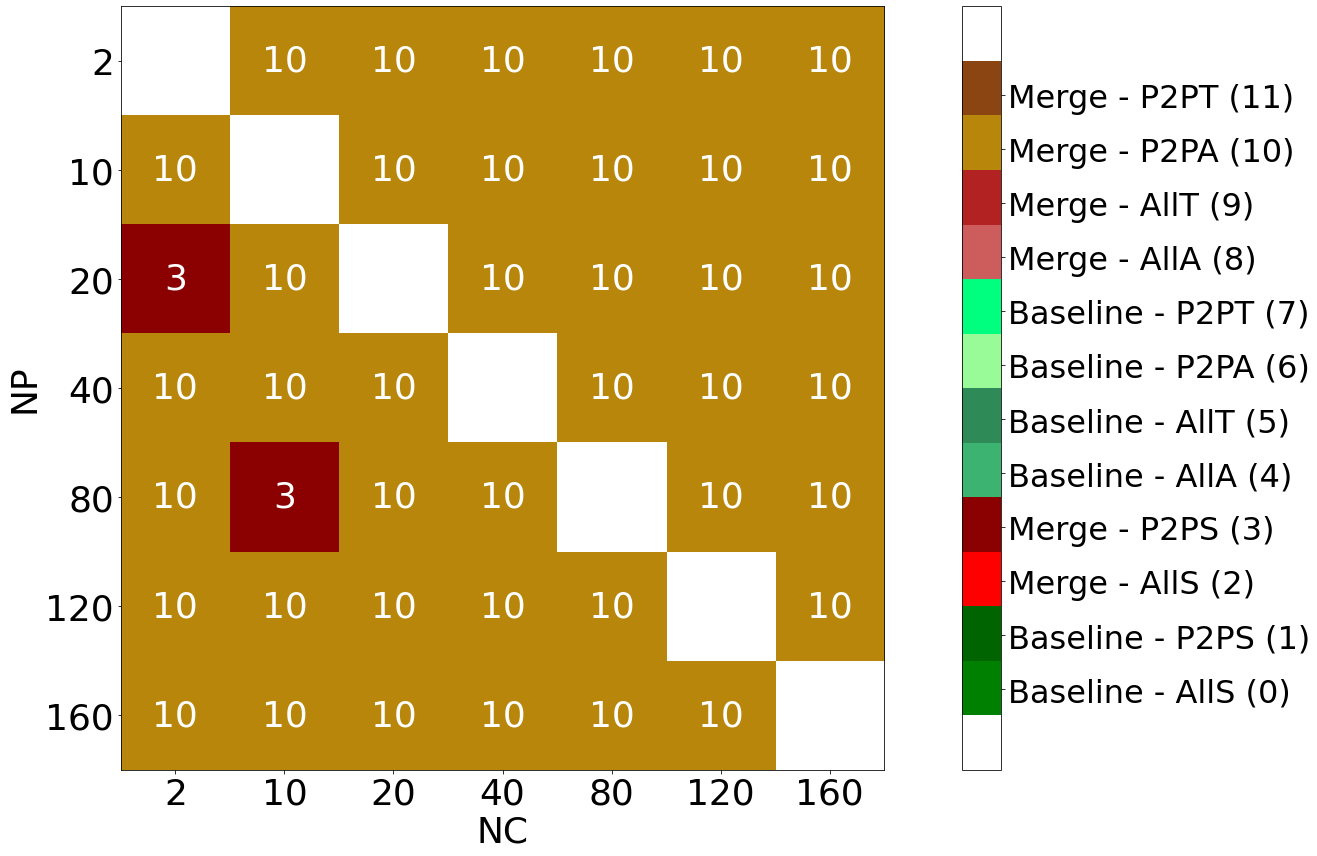

In [73]:
#Crea un heatmap teniendo en cuenta los colores anteriores
f=plt.figure(figsize=(24, 12))
ax=f.add_subplot(111)

myColors = (colors.to_rgba("white"), 
    colors.to_rgba("green"), 
    colors.to_rgba("darkgreen"),  # En lugar de "darkgreen"
    colors.to_rgba("red"), 
    colors.to_rgba("darkred"),  # En lugar de "darkred"
    colors.to_rgba("mediumseagreen"),  # En lugar de "mediumseagreen"
    colors.to_rgba("seagreen"),  # En lugar de "seagreen"
    colors.to_rgba("palegreen"), 
    colors.to_rgba("springgreen"), 
    colors.to_rgba("indianred"), 
    colors.to_rgba("firebrick"),
    colors.to_rgba("darkgoldenrod"),
    colors.to_rgba("saddlebrown"),
    colors.to_rgba("white"))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

im = ax.imshow(heatmap,cmap=cmap,interpolation='nearest')

# Loop over data dimensions and create text annotations.
used_aux=0
results_str = get_heatmap_strings(heatmap)
for i in range(len(processes)):
    for j in range(len(processes)):
        if i!=j:
            aux_color="white"
            if 0 <= heatmap[i, j] <= 1 or 4 <= heatmap[i, j] <= 7: # El 1 puede necesitar texto en negro
                aux_color="black"
            results_index = i*len(processes) +j-used_aux
            if len(results_str[results_index]) == 1:
                text = results_str[results_index][0]
                ax.text(j, i, text, ha="center", va="center", color=aux_color, fontsize=36)
            else:
                add_aux = 0.33
                for line in range(len(results_str[results_index])):
                    i_range = i - 0.5 + add_aux
                    ax.text(j, i_range, results_str[results_index][line],
                            ha="center", va="center", color=aux_color, fontsize=36)
                    add_aux+=0.33
        else:
            used_aux+=1

ax.set_ylabel("NP", fontsize=36)
ax.set_xlabel("NC", fontsize=36)

ax.set_xticklabels(['']+processes, fontsize=36)
ax.set_yticklabels(['']+processes, fontsize=36)


labelsMethods_aux = ['Baseline - AllS (0)', 'Baseline - P2PS (1)',
                    'Merge - AllS (2)','Merge - P2PS (3)',
                    'Baseline - AllA (4)', 'Baseline - AllT (5)','Baseline - P2PA (6)','Baseline - P2PT (7)',
                    'Merge - AllA (8)','Merge - AllT (9)','Merge - P2PA (10)','Merge - P2PT (11)']
colorbar=f.colorbar(im, ax=ax)
tick_bar = []
for i in range(len(used_config)):
    tick_bar.append(0.37 + i*0.92) #Config de 12 valores
colorbar.set_ticks(tick_bar) 
colorbar.set_ticklabels(labelsMethods_aux)
colorbar.ax.tick_params(labelsize=32)
#

f.tight_layout()
print("Filename: Heatmap_"+tipo+".png")
f.savefig("Images/Heatmap_"+tipo+".png", format="png")

In [43]:
aux_array = []
for data in results:
    aux_array+=data
aux_results, aux_counts = np.unique(aux_array, return_counts=True)
print(aux_results)
print(aux_counts)

aux_array = [0] * len(results)
for index in range(len(results)):
    aux_array[index] = results[index][0]
aux_results, aux_counts = np.unique(aux_array, return_counts = True)
print(aux_results)
print(aux_counts)


[ 1  2  3  4  6  8 10 11]
[ 1 17 20  1  1 22 27  1]
[ 2  3  8 10 11]
[ 5  9 11 16  1]


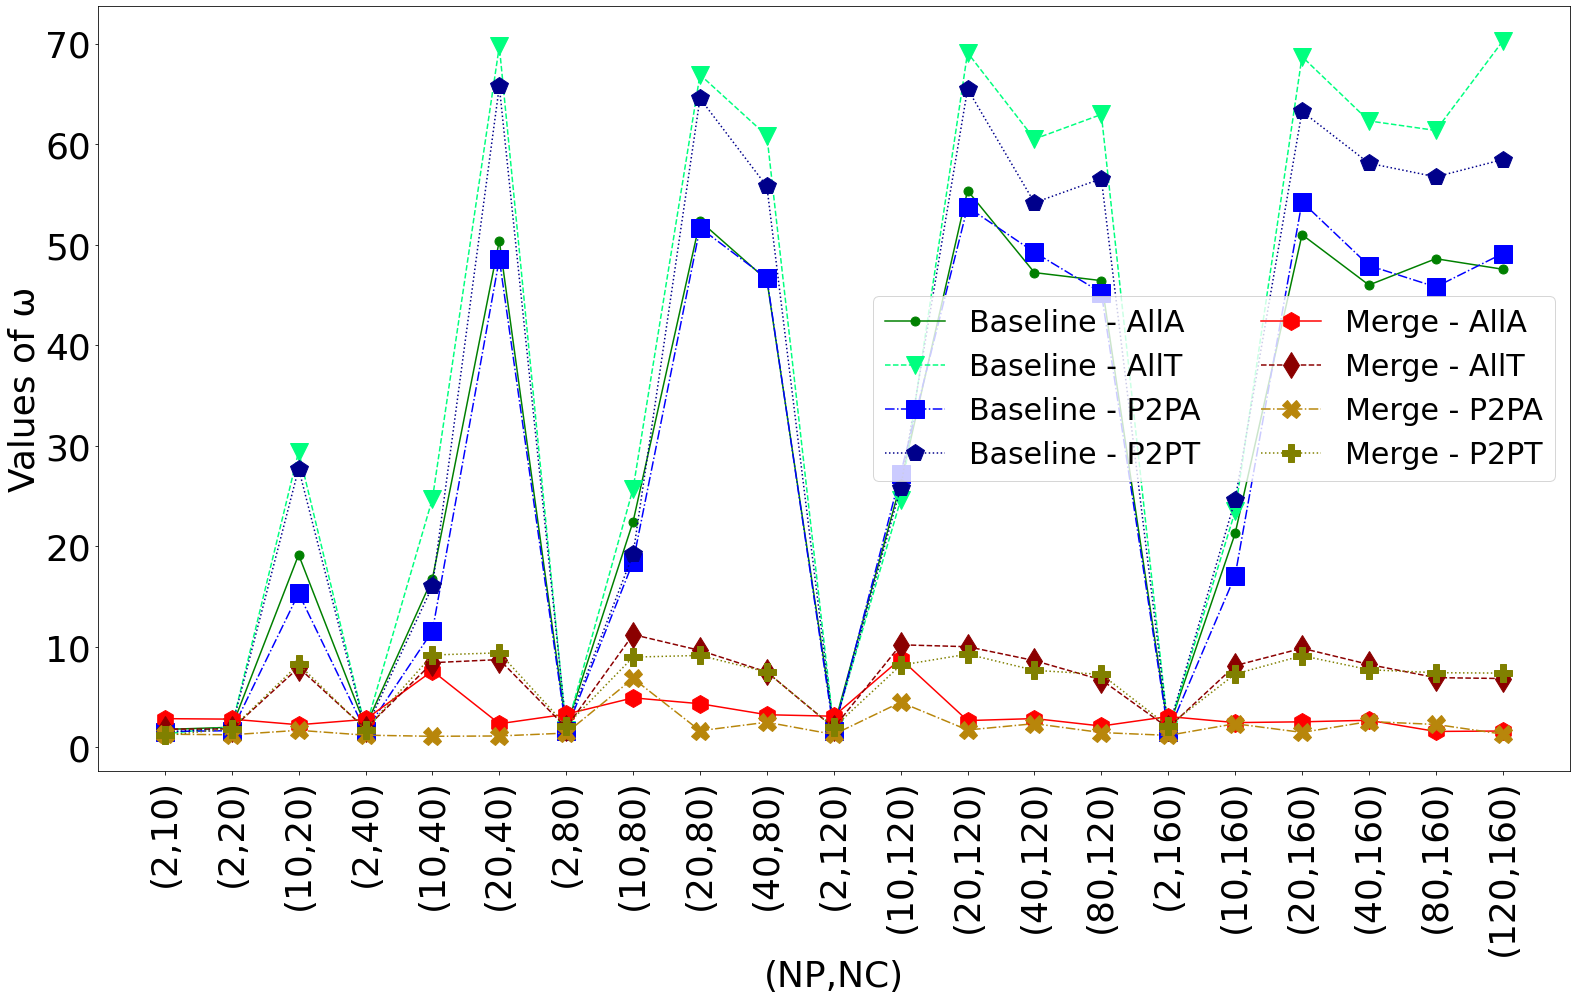

In [22]:
used_direction='e'
test_parameter='omega' #Valores son "alpha" o "omega"

if test_parameter == 'alpha':
    name_fig="Alpha_"
    real_parameter='Alpha'
    name_legend = "Values of α"
    used_config = configurations_simple
    data_aux = grouped_aggM[grouped_aggM[real_parameter] > 0]
elif test_parameter == 'omega':
    name_fig="Omega_"
    real_parameter='Omega'
    name_legend = "Values of ω"
    used_config = configurations
    data_aux = grouped_aggLAsynch[grouped_aggLAsynch[real_parameter] > 0]
if used_direction=='s':
    data_aux=data_aux.query('NP > NC')
    name_fig= name_fig+"Shrink"
elif used_direction=='e':
    data_aux=data_aux.query('NP < NC')
    name_fig= name_fig+"Expand"
elif used_direction=='a':
    name_fig= name_fig+"All"    

plot_data = []
for config in used_config:
    if config[0] > 0:
        dataLists = get_config_data(real_parameter, data_aux, config)
        dataLists = list(filter(lambda x: x != float('infinity'), dataLists))
        plot_data.append(dataLists)

labels_aux = []
for ns_aux in processes:
    for np_aux in processes:
        if used_direction=='s' and np_aux > ns_aux or used_direction=='e' and np_aux < ns_aux or used_direction=='a' and np_aux != ns_aux:
            new_label = "(" + str(np_aux) + "," + str(ns_aux) + ")"
            labels_aux.append(new_label)
#print(data_aux[real_parameter])
#print(plot_data)
#print(len(plot_data))
#print(labels_aux)
#print(len(labels_aux))
labelsMethods_aux = ['Baseline - AllA', 'Baseline - AllT','Baseline - P2PA','Baseline - P2PT',
                    'Merge - AllA','Merge - AllT','Merge - P2PA','Merge - P2PT']

f=plt.figure(figsize=(22, 14))
ax=f.add_subplot(111)
x = np.arange(len(labels_aux))
for index in range(len(plot_data)):
    array_aux = plot_data[index]
    ax.plot(x, array_aux, color=colors_m[index%len(colors_m)], linestyle=linestyle_m[index%len(linestyle_m)], \
        marker=markers_m[index%len(markers_m)], markersize=18, label=labelsMethods_aux[index])

ax.set_xlabel("(NP,NC)", fontsize=36)
ax.set_ylabel(name_legend, fontsize=36)
plt.xticks(x, labels_aux,rotation=90)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.legend(loc='best', fontsize=30,ncol=2,framealpha=0.8)
        
f.tight_layout()
f.savefig("Images/LinePlot_"+name_fig+".png", format="png")

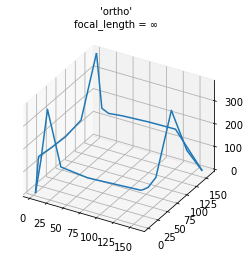

In [114]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

# Get the test data
#X, Y, Z = axes3d.get_test_data(0.05)

aux = grouped_aggG.loc[u_sols[0],'T_total']
Z = [None] * len(processes)
X, Y = np.meshgrid(processes, processes)
removed_index = 0
for i in range(len(processes)):
    Z[i] = [0] * len(processes)
    for j in range(len(processes)):
        if i!=j:
            real_i = i - removed_index
            real_j = j - removed_index
            Z[i][j] = aux.values[real_i*len(processes)+real_j]
        else:
            Z[i][j] = 0
            removed_index += 1  
Z = np.array(Z)

ax.plot_wireframe(X, Y, Z, rstride=20, cstride=10)
ax.set_proj_type('ortho')  # FOV = 0 deg
ax.set_title("'ortho'\nfocal_length = ∞", fontsize=10)
plt.show()

In [ ]:
import dask.dataframe as dd
ddf = dd.from_pandas(dfL[(dfL.Asynch_Iters == False)], npartitions=10)
group = ddf.groupby('NP')['T_iter']
grouped_aggLSynch = group.agg(['mean'])
grouped_aggLSynch = grouped_aggLSynch.rename(columns={'mean':'T_iter'}) 
grouped_aggLSynch = grouped_aggLSynch.compute()

In [114]:
a = np.array([[9.87, 9.03, 6.81],
              [7.18, 8.35, 7.00],
              [8.39, 7.58, 7.68],
              [7.45, 6.33, 9.35],
              [6.41, 7.10, 9.33],
              [8.00, 8.24, 8.44]])
b = np.array([[6.35, 7.30, 7.16],
              [6.65, 6.68, 7.63],
              [5.72, 7.73, 6.72],
              [7.01, 9.19, 7.41],
              [7.75, 7.87, 8.30],
              [6.90, 7.97, 6.97]])
c = np.array([[3.31, 8.77, 1.01],
              [8.25, 3.24, 3.62],
              [6.32, 8.81, 5.19],
              [7.48, 8.83, 8.91],
              [8.59, 6.01, 6.07],
              [3.07, 9.72, 7.48]])
my_daa_aux = [a,b,c]

F1, p_aux = stats.f_oneway(a, b, c)
F2, p_aux2 = stats.f_oneway(*my_daa_aux,axis=0)

print(F1)
print(p_aux)
print(F2)
print(p_aux2)

[1.75676344 0.03701228 3.76439349]
[0.20630784 0.96375203 0.04733157]
[2.17054203 1.7721764  0.83496214 0.27720765 0.59800783 0.42146685]
[0.19532397 0.24843587 0.47871884 0.76709983 0.5796655  0.67410377]


In [89]:
dfG

Total_Resizes  Total_Groups  Total_Stages  Granularity    SDR   ADR  \
0                 1             2             4       100000  100.0   0.0   
1                 1             2             4       100000  100.0   0.0   
2                 1             2             4       100000  100.0   0.0   
3                 1             2             4       100000  100.0   0.0   
4                 1             2             4       100000  100.0   0.0   
...             ...           ...           ...          ...    ...   ...   
1675              1             2             4       100000    3.4  96.6   
1676              1             2             4       100000    3.4  96.6   
1677              1             2             4       100000    3.4  96.6   
1678              1             2             4       100000    3.4  96.6   
1679              1             2             4       100000    3.4  96.6   

              DR Redistribution_Method Redistribution_Strategy Spawn_Method  \
0     3947883504                (0, 1)                  (1, 1)       (0, 0)   
1     3947883504                (0, 1)                  (1, 1)       (0, 0)   
2     3947883504                (0, 1)                  (1, 1)       (0, 0)   
3     3947883504                (0, 1)                  (1, 1)       (0, 0)   
4     3947883504                (0, 1)                  (1, 1)       (0, 0)   
...          ...                   ...                     ...          ...   
1675  3947883503                (0, 1)                  (1, 2)       (0, 1)   
1676  3947883503                (0, 1)                  (1, 2)       (0, 1)   
1677  3947883503                (0, 1)                  (1, 2)       (0, 1)   
1678  3947883503                (0, 1)                  (1, 2)       (0, 1)   
1679  3947883503                (0, 1)                  (1, 2)       (0, 1)   

      ...          Stage_Bytes       Iters Asynch_Iters  \
0     ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
1     ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
2     ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
3     ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
4     ...  (0, 8, 8, 33176880)  (500, 500)       (0, 0)   
...   ...                  ...         ...          ...   
1675  ...  (0, 8, 8, 33176880)  (500, 500)       (4, 0)   
1676  ...  (0, 8, 8, 33176880)  (500, 500)       (4, 0)   
1677  ...  (0, 8, 8, 33176880)  (500, 500)       (4, 0)   
1678  ...  (0, 8, 8, 33176880)  (500, 500)       (4, 0)   
1679  ...  (0, 8, 8, 33176880)  (500, 500)       (4, 0)   

                                                 T_iter  \
0     ((0.08095, 0.076509, 0.079877, 0.074691, 0.076...   
1     ((0.083757, 0.069349, 0.068418, 0.065849, 0.06...   
2     ((0.096849, 0.072226, 0.075321, 0.065634, 0.07...   
3     ((0.07964, 0.070345, 0.073844, 0.086362, 0.072...   
4     ((0.098563, 0.068683, 0.090294, 0.083441, 0.08...   
...                                                 ...   
1675  ((0.653634, 0.634598, 0.633836, 0.634582, 0.63...   
1676  ((0.653119, 0.633832, 0.633014, 0.633593, 0.63...   
1677  ((0.652854, 0.633725, 0.632971, 0.633643, 0.63...   
1678  ((0.652802, 0.633527, 0.633319, 0.633376, 0.63...   
1679  ((0.653575, 0.634228, 0.634006, 0.63414, 0.633...   

                                               T_stages      T_spawn  \
0     (((0.010705, 0.001643, 0.000203, 0.067232), (0...  (1.347948,)   
1     (((0.010718, 0.000521, 4.2e-05, 0.071717), (0....  (1.408781,)   
2     (((0.010704, 0.001999, 0.000233, 0.079332), (0...  (1.336949,)   
3     (((0.010704, 0.003768, 0.000384, 0.062777), (0...   (1.44455,)   
4     (((0.010716, 0.000262, 0.00023, 0.086761), (0....  (1.467106,)   
...                                                 ...          ...   
1675  (((0.622565, 7e-06, 2e-06, 0.03106), (0.62308,...   (1.34195,)   
1676  (((0.621538, 0.000137, 3e-06, 0.03144), (0.621...  (1.382511,)   
1677  (((0.621539, 9.8e-05, 2e-06, 0.031214), (0.621...  (1.348554